# Example of structured data processing - full dataset
https://keras.io/examples/structured_data/structured_data_classification_from_scratch/

#### Import the necessary modules and load the data as before...

In [1]:
random_seed = 42000
%matplotlib widget 
import tensorflow as tf # machine learning library
import numpy as np # numerical library
import pandas as pd # data analysis library
from tensorflow import keras # high-level API to build and train deep learning models
from tensorflow.keras import layers # layers for deep learning models
import prettytable as pt # for pretty tables
import matplotlib.pyplot as plt # for plotting

file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"
dataframe = pd.read_csv(file_url)

# We know these values from dataset documentation https://archive.ics.uci.edu/ml/datasets/heart+Disease
pain_types = ['no pain', 'typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']
sexes = ['Female', 'Male']
YesNo = ['No', 'Yes']
electrocardiographic_results = ['normal', 'ST-T wave abnormality', 'left ventricular hypertrophy']
slopes = ['unknown', 'upsloping', 'flat', 'downsloping']

# simple method to print the data in a more understandable way
def print_data(dataframe, patient_index):

    datarow = dataframe.iloc[patient_index]

    # print the above data as a pretty table
    table = pt.PrettyTable()
    table.field_names = ["Shortcut", "Description", "Value for patient number " + str(patient_index)  ]
    table.add_row(["age", "age in years", datarow[0]])
    table.add_row(["sex", "biological sex", sexes[datarow[1]]])
    table.add_row(["cp", "Chest pain type (0, 1, 2, 3, 4)", pain_types[datarow[2]]])
    table.add_row(["trestbps", "Resting blood pressure (in mm Hg on admission)", datarow[3]])
    table.add_row(["chol", "Cholesterol in mg/dl", datarow[4]])
    table.add_row(["fbs", "Fasting blood sugar in 120 mg/dl", YesNo[datarow[5]]])
    table.add_row(["restecg", "Resting electrocardiographic results", electrocardiographic_results[datarow[6]]])
    table.add_row(["thalach", "Maximum heart rate achieved", datarow[7]])
    table.add_row(["exang", "Exercise induced angina", YesNo[datarow[8]]])
    table.add_row(["oldpeak", "ST depression induced by exercise relative to rest", datarow[9]])
    table.add_row(["slope", "Peak exercise ST segment", slopes[datarow[10]]])
    table.add_row(["ca", "Number of major vessels (0-3) colored by fluoroscopy", datarow[11]])
    table.add_row(["thal", "Thal (3 = normal; 6 = fixed defect; 7 = reversible defect)", datarow[12]])
    table.add_row(["target", "Diagnosis of heart disease", datarow[13]])

    
    # print the whole table
    print(table)

# print example data - change the patient_index parameter to see a different patient
for i in range(5):
    print_data(dataframe,patient_index=i)

+----------+------------------------------------------------------------+------------------------------+
| Shortcut |                        Description                         |  Value for patient number 0  |
+----------+------------------------------------------------------------+------------------------------+
|   age    |                        age in years                        |              63              |
|   sex    |                       biological sex                       |             Male             |
|    cp    |              Chest pain type (0, 1, 2, 3, 4)               |        typical angina        |
| trestbps |       Resting blood pressure (in mm Hg on admission)       |             145              |
|   chol   |                    Cholesterol in mg/dl                    |             233              |
|   fbs    |              Fasting blood sugar in 120 mg/dl              |             Yes              |
| restecg  |            Resting electrocardiographic re

#### Let's split the data into a training and validation set:


In [2]:
# split the data into training and validation data, using a 80:20 split, random_state=42 means that the split is always the same using the same seed (42)
val_dataframe = dataframe.sample(frac=0.2, random_state=random_seed)

# use the rest of the data as training data
train_dataframe = dataframe.drop(val_dataframe.index)

print(
    "Using %d samples for training and %d for validation from the dataset of %d samples in total"
    % (len(train_dataframe), len(val_dataframe), len(dataframe))
)


Using 242 samples for training and 61 for validation from the dataset of 303 samples in total


#### Create the dataset for training
We will use tf.data.Dataset class - https://www.tensorflow.org/api_docs/python/tf/data/Dataset

Our data can now be accessed as tensors - https://www.tensorflow.org/api_docs/python/tf/Tensor

In [3]:
# create a function to convert the dataframe into a tensorflow dataset
def dataframe_to_dataset(dataframe):

    # make a local copy of the dataframe
    dataframe = dataframe.copy()

    # pop the target column from the dataframe, this is the column we want to predict - the prognosis of heart disease
    labels = dataframe.pop("target")

    # convert the data into pairs of (dict of features, label)
    new_data_format = (dict(dataframe), labels)

    # convert the pairs into a tensorflow dataset
    ds = tf.data.Dataset.from_tensor_slices(new_data_format)

    # shuffle the data
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds


# create the training and validation datasets
train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)


# print the first 5 samples of the training dataset to see what it looks like
for x, y in train_ds.take(5):
    print("Input (tensor with our structured data):", x)
    print("Target (tensor with value 0 or 1):", y)





Input (tensor with our structured data): {'age': <tf.Tensor: shape=(), dtype=int64, numpy=62>, 'sex': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'cp': <tf.Tensor: shape=(), dtype=int64, numpy=4>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=140>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=394>, 'fbs': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'restecg': <tf.Tensor: shape=(), dtype=int64, numpy=2>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=157>, 'exang': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=1.2>, 'slope': <tf.Tensor: shape=(), dtype=int64, numpy=2>, 'ca': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'thal': <tf.Tensor: shape=(), dtype=string, numpy=b'normal'>}
Target (tensor with value 0 or 1): tf.Tensor(0, shape=(), dtype=int64)
Input (tensor with our structured data): {'age': <tf.Tensor: shape=(), dtype=int64, numpy=58>, 'sex': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'cp': <tf.Tensor: shape

#### Batch the dataset

We well use batches if data to train and evaluate the model. Notice, what happens now when we call "take" on the dataset.


In [4]:
# how many samples are in the batch
batch_size = 32

train_ds = train_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

# this runs into an error if run repeatedly - run the cell above to reset the dataset
print("The first batch of the training dataset:")
for x, y in train_ds.take(1):
    print(x)
    print(y)

The first batch of the training dataset:
{'age': <tf.Tensor: shape=(32,), dtype=int64, numpy=
array([57, 64, 57, 55, 61, 71, 57, 66, 64, 63, 57, 43, 65, 42, 59, 53, 55,
       51, 64, 62, 54, 59, 64, 41, 58, 51, 58, 63, 53, 55, 63, 54],
      dtype=int64)>, 'sex': <tf.Tensor: shape=(32,), dtype=int64, numpy=
array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)>, 'cp': <tf.Tensor: shape=(32,), dtype=int64, numpy=
array([1, 1, 4, 4, 3, 4, 4, 4, 4, 1, 4, 4, 3, 4, 4, 3, 4, 4, 1, 4, 4, 4,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4], dtype=int64)>, 'trestbps': <tf.Tensor: shape=(32,), dtype=int64, numpy=
array([130, 170, 132, 140, 150, 112, 110, 178, 180, 145, 140, 115, 160,
       140, 170, 130, 180, 140, 110, 140, 140, 138, 128, 126, 136, 140,
       130, 124, 123, 160, 108, 122], dtype=int64)>, 'chol': <tf.Tensor: shape=(32,), dtype=int64, numpy=
array([236, 227, 207, 217, 243, 149, 335, 228, 325, 233, 192, 303, 360,
       2

### Feature preprocessing with Keras layers
We already know these keras.layers:
* tensorflow.keras.layers.Normalization: https://keras.io/api/layers/preprocessing_layers/numerical/normalization/
* tensorflow.keras.layers.IntegerLookup: https://keras.io/api/layers/preprocessing_layers/categorical/integer_lookup/

Now, we'll add another one:
* tensorflow.keras.layers.StringLookup: https://keras.io/api/layers/preprocessing_layers/categorical/string_lookup/

This way, the preprocessing will be part of our model, so we don't have to handle it "manually" before inference...

In [5]:
from tensorflow.keras.layers import IntegerLookup
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import StringLookup


def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature


def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = StringLookup if is_string else IntegerLookup
    # Create a lookup layer which will turn strings into integer indices
    lookup = lookup_class(output_mode="binary")

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    lookup.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = lookup(feature)
    return encoded_feature


#### Build our model

Now we can create end-to-end model and visualize it:

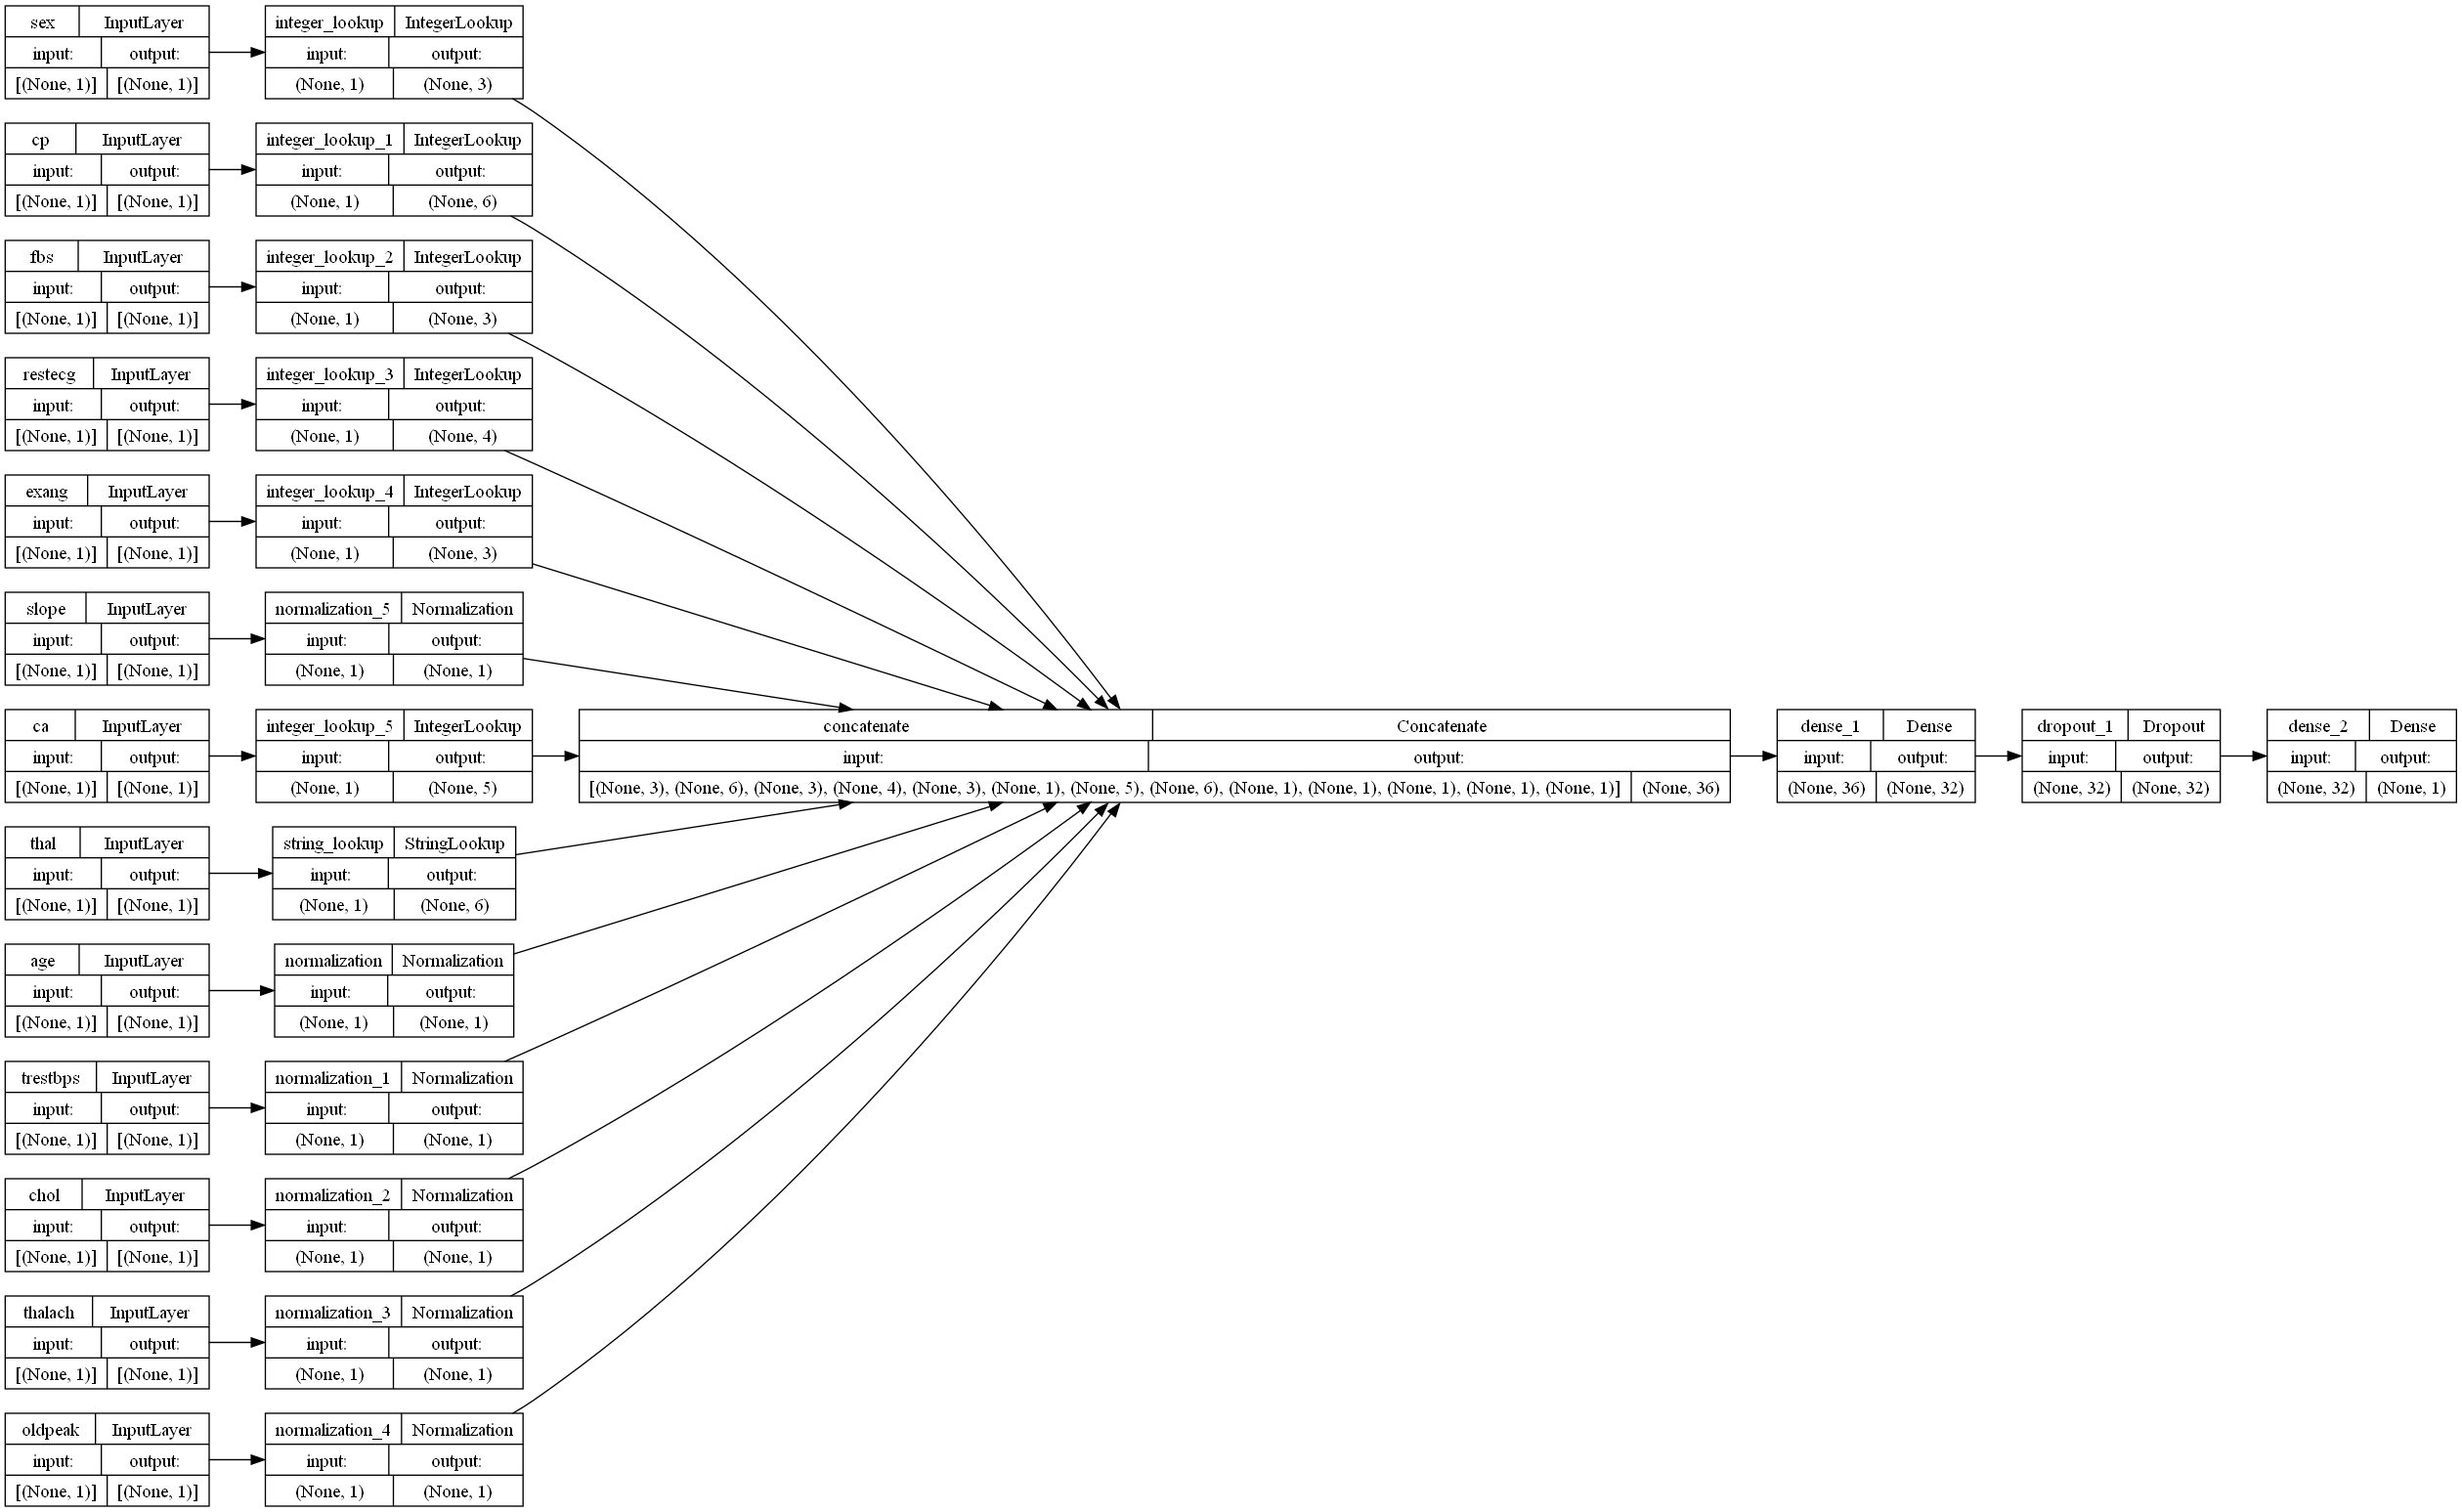

In [6]:
# Categorical features encoded as integers
sex = keras.Input(shape=(1,), name="sex", dtype="int64")
cp = keras.Input(shape=(1,), name="cp", dtype="int64")
fbs = keras.Input(shape=(1,), name="fbs", dtype="int64")
restecg = keras.Input(shape=(1,), name="restecg", dtype="int64")
exang = keras.Input(shape=(1,), name="exang", dtype="int64")
ca = keras.Input(shape=(1,), name="ca", dtype="int64")

# Categorical feature encoded as string
thal = keras.Input(shape=(1,), name="thal", dtype="string")

# Numerical features
age = keras.Input(shape=(1,), name="age")
trestbps = keras.Input(shape=(1,), name="trestbps")
chol = keras.Input(shape=(1,), name="chol")
thalach = keras.Input(shape=(1,), name="thalach")
oldpeak = keras.Input(shape=(1,), name="oldpeak")
slope = keras.Input(shape=(1,), name="slope")

all_inputs = [
    sex,
    cp,
    fbs,
    restecg,
    exang,
    ca,
    thal,
    age,
    trestbps,
    chol,
    thalach,
    oldpeak,
    slope,
]

# Integer categorical features
sex_encoded = encode_categorical_feature(sex, "sex", train_ds, False)
cp_encoded = encode_categorical_feature(cp, "cp", train_ds, False)
fbs_encoded = encode_categorical_feature(fbs, "fbs", train_ds, False)
restecg_encoded = encode_categorical_feature(restecg, "restecg", train_ds, False)
exang_encoded = encode_categorical_feature(exang, "exang", train_ds, False)
ca_encoded = encode_categorical_feature(ca, "ca", train_ds, False)

# String categorical features
thal_encoded = encode_categorical_feature(thal, "thal", train_ds, True)

# Numerical features
age_encoded = encode_numerical_feature(age, "age", train_ds)
trestbps_encoded = encode_numerical_feature(trestbps, "trestbps", train_ds)
chol_encoded = encode_numerical_feature(chol, "chol", train_ds)
thalach_encoded = encode_numerical_feature(thalach, "thalach", train_ds)
oldpeak_encoded = encode_numerical_feature(oldpeak, "oldpeak", train_ds)
slope_encoded = encode_numerical_feature(slope, "slope", train_ds)

all_features = layers.concatenate(
    [
        sex_encoded,
        cp_encoded,
        fbs_encoded,
        restecg_encoded,
        exang_encoded,
        slope_encoded,
        ca_encoded,
        thal_encoded,
        age_encoded,
        trestbps_encoded,
        chol_encoded,
        thalach_encoded,
        oldpeak_encoded,
    ]
)
x = layers.Dense(32, activation="relu")(all_features)
x = layers.Dropout(0.5)(x)
x = layers.Dense(32, activation="relu")(all_features)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(all_inputs, output)
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])


# in case of error: pydot.InvocationException: GraphViz's executables not found, we need to add the path to the graphviz executables to the PATH environment variable
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

# visualize the graph of our model
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")




#### The actuall training is simple :)

In [7]:
history = model.fit(train_ds, epochs=60, validation_data=val_ds)


Epoch 1/60
8/8 [==============================] - 1s 50ms/step - loss: 0.7415 - accuracy: 0.5496 - val_loss: 0.6520 - val_accuracy: 0.6885
Epoch 2/60
8/8 [==============================] - 0s 4ms/step - loss: 0.6239 - accuracy: 0.6653 - val_loss: 0.5979 - val_accuracy: 0.7377
Epoch 3/60
8/8 [==============================] - 0s 4ms/step - loss: 0.5851 - accuracy: 0.7149 - val_loss: 0.5578 - val_accuracy: 0.7213
Epoch 4/60
8/8 [==============================] - 0s 4ms/step - loss: 0.5700 - accuracy: 0.6860 - val_loss: 0.5289 - val_accuracy: 0.7213
Epoch 5/60
8/8 [==============================] - 0s 4ms/step - loss: 0.5285 - accuracy: 0.7438 - val_loss: 0.5051 - val_accuracy: 0.7049
Epoch 6/60
8/8 [==============================] - 0s 4ms/step - loss: 0.5283 - accuracy: 0.7314 - val_loss: 0.4875 - val_accuracy: 0.7049
Epoch 7/60
8/8 [==============================] - 0s 4ms/step - loss: 0.4800 - accuracy: 0.7810 - val_loss: 0.4734 - val_accuracy: 0.6885
Epoch 8/60
8/8 [=================

### Now we can use the trained model on the "real" data

In [8]:

# This is where we insert our new data for the model to predict on
sample = {
    "age": 15,

    "sex": sexes.index("Female"), # get the value from our sexes list

    # Chest pain type
    "cp": pain_types.index("no pain"), # one of 'no pain', 'typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'

    # resting blood pressure (in mm Hg on admission to the hospital). Common values: <120 (normal), 120-129 (elevated), 130-139 (high blood pressure (hypertension) stage 1), 140-180 (hypertension stage 2), >180 (hypertensive crisis)
    "trestbps": 100,  

    # serum cholestoral in mg/dl, Common values: <200 (normal), 200-239 (borderline high), >240 (high), normal for Females 19 and younger is less than 170 mg/dL
    "chol": 160,  

    # fasting blood sugar > 120 mg/dl (A fasting blood sugar level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126 mg/dL or higher indicates you have diabetes)
    "fbs": YesNo.index("No"), 

    # resting electrocardiographic results, one of 'normal', 'ST-T wave abnormality', 'left ventricular hypertrophy'
    "restecg": electrocardiographic_results.index("normal"),

    # maximum heart rate achieved. To estimate normal maximum age-related heart rate, subtract your age from 220. 
    "thalach": 204,

    # exercise induced angina (chest pain)
    "exang": YesNo.index("No"),

    # ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot) https://en.wikipedia.org/wiki/ST_depression
    "oldpeak": 2.3,

    # the slope of the peak exercise ST segment, one of 'upsloping', 'flat', 'downsloping'
    "slope": 1,

    # number of major vessels (0-3) colored by flouroscopy https://en.wikipedia.org/wiki/Fluoroscopy
    "ca": 0,

    # thal, one of 'fixed', 'normal', 'reversible' 
    "thal": "normal",
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = model.predict(input_dict)

print(
    "This particular patient had a %.1f percent probability "
    "of having a heart disease, as evaluated by our model." % (100 * predictions[0][0],)
)


1/1 [==============================] - 0s 198ms/step
This particular patient had a 0.2 percent probability of having a heart disease, as evaluated by our model.


#### Jak dobrý je náš ML model tentokrát? 

Trained model accuracy: 83.61% at threshold 0.18


(0.5, 1.0)

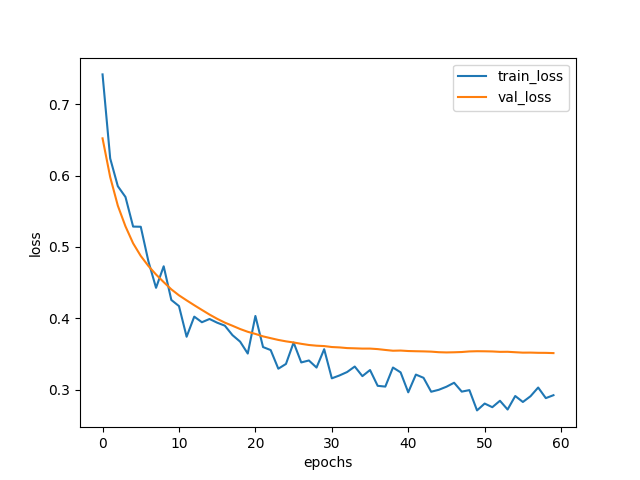

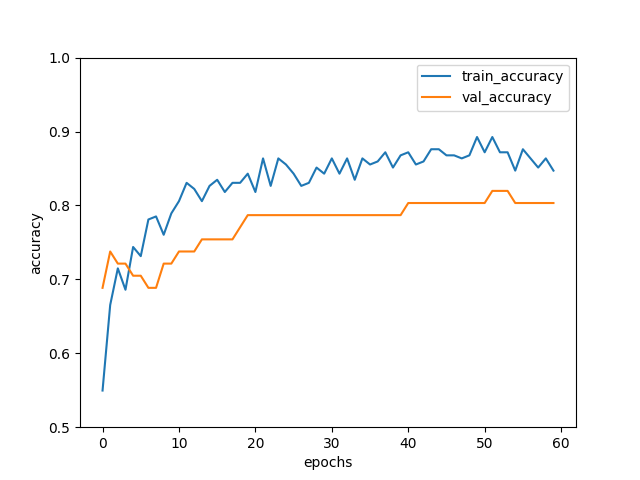

In [9]:
def evaluate_predictions(labels, predictions):
    '''
    Funkce pro vyhodnocení predikcí. Vrací accuracy a práh, při kterém byla dosažena nejvyšší accuracy.
    (Práh znamená, že pokud je predikce vyšší než práh, tak se predikuje třída 1, jinak 0.)
    '''
    best_threshold = 0
    best_accuracy = 0
    for threshold in np.arange(0, 1, 0.01):
        metric = tf.keras.metrics.Accuracy()
        metric.update_state(labels, np.array(predictions) > threshold)
        accuracy = metric.result().numpy()
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_threshold = threshold

    return best_accuracy, best_threshold

# Spočítáme si accuracy na validační množině
predictions = []
val_labels = val_dataframe.pop("target")
for i in range(len(val_dataframe.values)):
    input_dict = { name: tf.convert_to_tensor([val_dataframe.values[i][j]]) 
                  for j, name in enumerate(val_dataframe.columns) }

    predictions.append(model.predict(input_dict,verbose = 0)[0][0])


best_accuracy_trained, best_threshold_trained = evaluate_predictions(val_labels.values, predictions)

# Porovnáme natrénovaný model s původním naivním modelem
print("Trained model accuracy: {:.2f}% at threshold {:.2f}".format(best_accuracy_trained * 100, best_threshold_trained))


# zobrazíme graf vývoje loss a accuracy v průběhu trénování
import pandas as pd
frame = pd.DataFrame(history.history)
frame.head()

# plot the loss
plt.figure()
plt.subplot(111)
plt.plot(frame[['loss', 'val_loss']])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])


# plot the accuracy and smoothed accuracy as two subplots
plt.figure()
plt.subplot(111)
plt.plot(frame[['accuracy', 'val_accuracy']])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.ylim(0.5, 1)




#### Závěr

- Model se opět přeučuje, mohli jsme trénovat méně epoch. Větší model by nám nejspíš moc nepomohl. 
- Accuracy je tentokrát ~ 83 %, tedy o 11 % více než u modelu s méně atributy, juchů. 
- Ve skutečnoti je naše měření accuracy docela nepřesné... 
    - Měříme pouze jeden exmeriment, výsledek je různý podle toho, kdy trénování ukončíme....
    - Měříme pouze na validačních datech... ve skutečnosti bychom měli měřit na testovacích datech, které jsme si nechali stranou a neovlivňují náš úsudek o výběru modelu.